# Ungraded Lab: Beyond Hello World, A Computer Vision Example 超越 Hello World，一个计算机视觉示例
In the previous exercise, you saw how to create a neural network that figured out the problem you were trying to solve. This gave an explicit example of learned behavior. Of course, in that instance, it was a bit of an overkill because it would have been easier to write the function `y=2x-1` directly instead of bothering with using machine learning to learn the relationship between `x` and `y`.

But what about a scenario where writing rules like that is much more difficult -- for example a computer vision problem? Let's take a look at a scenario where you will build a neural network to recognize different items of clothing, trained from a dataset containing 10 different types.

在之前的练习中，你看到了如何创建一个神经网络来解决你试图解决的问题。这是一个明确的学习行为的例子。当然，在那个例子中，使用机器学习来学习 x 和 y 之间的关系可能有点大材小用，因为直接写出函数 y = 2x - 1 会更简单。

但是，如果遇到一种场景，编写这样的规则要困难得多——比如计算机视觉问题呢？让我们来看一个场景，你将构建一个神经网络来识别不同的服装类别，训练数据集中包含 10 种不同类型的服装。

## Start Coding 开始编写代码

You can start with importing the libraries you will need throughout this notebook.

你可以从导入本笔记本中所需的库开始。

In [16]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

The [Fashion MNIST dataset](https://github.com/zalandoresearch/fashion-mnist) is a collection of grayscale 28x28 pixel clothing images. Each image is associated with a label as shown in this table.

Fashion MNIST 数据集 是一个包含 28x28 像素灰度服装图像的集合。每张图像都与一个标签相关联，如下表所示。

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

This dataset is available directly in the [tf.keras.datasets](https://www.tensorflow.org/api_docs/python/tf/keras/datasets) API and you load it like this:

这个数据集可以直接通过 tf.keras.datasets API 获取，你可以像这样加载它：

In [4]:
# Load the Fashion MNIST dataset
# fmnist = tf.keras.datasets.fashion_mnist

Calling `load_data()` on this object will give you two tuples with two lists each. These will be the training and testing values for the graphics that contain the clothing items and their labels.

调用 load_data() 方法会返回两个元组，每个元组包含两个列表。这些列表分别是训练集和测试集的图像数据及其对应的标签。


In [2]:
# Load the training and test split of the Fashion MNIST dataset
# (training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

In [36]:
#I use kaggle as the notebook, which will load the dataset as below
import kagglehub

def load_images(file_path):
    with open(file_path, 'rb') as f:
        data = np.frombuffer(f.read(), dtype=np.uint8, offset=16)
    return data.reshape(-1, 28, 28)

def load_labels(file_path):
    with open(file_path, 'rb') as f:
        data = np.frombuffer(f.read(), dtype=np.uint8, offset=8)
    return data

path = kagglehub.dataset_download("zalando-research/fashionmnist")

training_images_path = path + '/train-images-idx3-ubyte'  
training_labels_path = path + '/train-labels-idx1-ubyte'
testing_images_path = path + '/t10k-images-idx3-ubyte'
testing_labels_path = path + '/t10k-labels-idx1-ubyte'

# load data
training_images = load_images(training_images_path)
training_labels = load_labels(training_labels_path)
testing_images = load_images(testing_images_path)
testing_labels = load_labels(testing_labels_path)

What do these values look like? You can print a training image (both as an image and a numpy array), and a training label to see. Experiment with different indices in the array. For example, also take a look at index `42`. That's a different boot than the one at index `0`.

这些值是什么样子的呢？你可以打印一张训练图像（既作为图像显示，也作为 numpy 数组显示）以及一个训练标签来查看。可以尝试数组中的不同索引。例如，也可以看看索引 42 的图像。这双鞋与索引 0 的那双不同。

LABEL: 9

IMAGE PIXEL ARRAY:

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1 

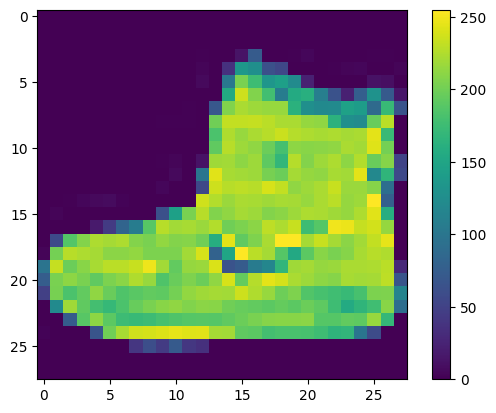

In [18]:
# You can put between 0 to 59999 here
index = 0

# Set number of characters per row when printing
np.set_printoptions(linewidth=320)

# Print the label and image
print(f'LABEL: {training_labels[index]}')
print(f'\nIMAGE PIXEL ARRAY:\n\n{training_images[index]}\n\n')

# Visualize the image using the default colormap (viridis)
plt.imshow(training_images[index])
plt.colorbar()
plt.show()

You'll notice that all of the values in the number are between 0 and 255. If you are training a neural network especially in image processing, for various reasons it will usually learn better if you scale all values to between 0 and 1. It's a process called _normalization_ and fortunately in Python, it's easy to normalize an array without looping. You do it like this:

你会注意到，数组中所有的值都在 0 到 255 之间。如果你正在训练一个神经网络，尤其是在图像处理中，出于各种原因，将所有值缩放到 0 到 1 之间通常会让模型学习得更好。这个过程称为归一化（normalization）。幸运的是，在 Python 中，你可以轻松地对数组进行归一化，而无需使用循环。你可以这样做：

In [19]:
# Normalize the pixel values of the train and test images
train_images  = training_images / 255.0
test_images = testing_images / 255.0

Now you might be wondering why the dataset is split into two: training and testing? Remember we spoke about this in the intro? The idea is to have 1 set of data for training, and then another set of data that the model hasn't yet seen. This will be used to evaluate how good it would be at classifying values.

现在你可能会好奇，为什么数据集被分为两部分：训练集和测试集？还记得我们在介绍中提到过这一点吗？这样做的目的是用一组数据进行训练，然后用另一组模型从未见过的数据进行评估。测试集将用于评估模型在分类任务中的表现。

Let's now design the model. There's quite a few new concepts here. But don't worry, you'll get the hang of them. 

现在让我们来设计模型。这里有一些新的概念，但别担心，你会逐渐熟悉它们的。

In [20]:
# Build the classification model
model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(28,28)),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

[Sequential](https://keras.io/api/models/sequential/): That defines a sequence of layers in the neural network.

这定义了神经网络中的层序列。你可以将模型看作是一层层堆叠起来的结构。

[Flatten](https://keras.io/api/layers/reshaping_layers/flatten/): Remember earlier where our images were a 28x28 pixel matrix when you printed them out? Flatten just takes that square and turns it into a 1-dimensional array.

还记得之前打印图像时，它们是 28x28 像素的矩阵吗？Flatten 层的作用是将这个二维矩阵转换为一维数组。

[Dense](https://keras.io/api/layers/core_layers/dense/): Adds a layer of neurons

添加一层神经元。每个神经元都会接收上一层的所有输入，并输出一个值。

Each layer of neurons needs an [activation function](https://keras.io/api/layers/activations/) to tell them what to do. There are a lot of options, but just use these for now: 

每一层神经元都需要一个激活函数来告诉它们该做什么。以下是两个常用的激活函数：

[ReLU](https://keras.io/api/layers/activations/#relu-function) effectively means:

它的作用是：

```
if x > 0: 
  return x

else: 
  return 0
```

In other words, it only passes values greater than 0 to the next layer in the network.

换句话说，它只将大于 0 的值传递到网络的下一层。

[Softmax](https://keras.io/api/layers/activations/#softmax-function) takes a list of values and scales these so the sum of all elements will be equal to 1. When applied to model outputs, you can think of the scaled values as the probability for that class. For example, in your classification model which has 10 units in the output dense layer, having the highest value at `index = 4` means that the model is most confident that the input clothing image is a coat. If it is at index = 5, then it is a sandal, and so forth. See the short code block below which demonstrates these concepts. You can also watch this [lecture](https://www.youtube.com/watch?v=LLux1SW--oM&ab_channel=DeepLearningAI) if you want to know more about the Softmax function and how the values are computed.

它接收一组值并将其缩放，使得所有元素的总和等于 1。当应用于模型输出时，你可以将缩放后的值视为该类别的概率。例如，在你的分类模型中，输出层有 10 个神经元，如果 index = 4 的值最大，则模型最有信心认为输入的服装图像是一件外套；如果 index = 5 的值最大，则模型认为它是一双凉鞋，依此类推。


In [21]:
# Declare sample inputs and convert to a tensor
inputs = np.array([[1.0, 3.0, 4.0, 2.0]])
inputs = tf.convert_to_tensor(inputs)
print(f'input to softmax function: {inputs.numpy()}')

# Feed the inputs to a softmax activation function
outputs = tf.keras.activations.softmax(inputs)
print(f'output of softmax function: {outputs.numpy()}')

# Get the sum of all values after the softmax
sum = tf.reduce_sum(outputs)
print(f'sum of outputs: {sum}')

# Get the index with highest value
prediction = np.argmax(outputs)
print(f'class with highest probability: {prediction}')

input to softmax function: [[1. 3. 4. 2.]]
output of softmax function: [[0.0320586  0.23688282 0.64391426 0.08714432]]
sum of outputs: 1.0
class with highest probability: 2


The next thing to do, now that the model is defined, is to actually build it. You do this by compiling it with an optimizer and loss function as before (notice that a class is passed to the optimizer, while a string is passed to the loss, in TF you will find that there are multiple ways of defining things, for instance "adam" would be a valid optimizer, as well as `tf.keras.losses.SparseCategoricalCrossentropy()` will be a valid loss function) -- and then you train it by calling `model.fit()` asking it to fit your training data to your training labels. It will figure out the relationship between the training data and its actual labels so in the future if you have inputs that looks like the training data, then it can predict what the label for that input is.

在定义好模型之后，下一步是实际构建它。你可以通过编译模型来完成这一步，就像之前一样指定优化器和损失函数（注意，优化器可以是一个类，而损失函数可以是一个字符串。在 TensorFlow 中，你会发现有多种定义方式，例如 "adam" 是一个有效的优化器，而 tf.keras.losses.SparseCategoricalCrossentropy() 是一个有效的损失函数）。然后，通过调用 model.fit() 来训练模型，要求它将训练数据与训练标签进行拟合。模型将学习训练数据与其实际标签之间的关系，这样在未来，如果你有类似于训练数据的输入，它就可以预测该输入的标签。

In [22]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7822 - loss: 0.6290
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8600 - loss: 0.3863
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8754 - loss: 0.3434
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8823 - loss: 0.3180
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8895 - loss: 0.2988


Once it's done training -- you should see an accuracy value at the end of the final epoch. It might look something like `0.9098`. This tells you that your neural network is about 91% accurate in classifying the training data. That is, it figured out a pattern match between the image and the labels that worked 91% of the time. Not great, but not bad considering it was only trained for 5 epochs and done quite quickly.

But how would it work with unseen data? That's why we have the test images and labels. We can call [`model.evaluate()`](https://keras.io/api/models/model_training_apis/#evaluate-method) with this test dataset as inputs and it will report back the loss and accuracy of the model. Let's give it a try:

训练完成后，你会在最后一个 epoch 结束时看到一个准确率值。它可能类似于 0.9098。这表示你的神经网络在分类训练数据时的准确率约为 91%。也就是说，它找到了图像和标签之间的模式匹配，并且在 91% 的情况下是正确的。虽然不算特别好，但考虑到它只训练了 5 个 epoch 并且速度很快，这个结果已经不错了。

但它在未见过的数据上表现如何呢？这就是为什么我们有测试图像和标签。我们可以使用这个测试数据集作为输入调用 model.evaluate()，它将返回模型的损失值和准确率。让我们试一试：

In [23]:
# Evaluate the model on unseen data
model.evaluate(test_images, testing_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8768 - loss: 0.3381


[0.34294870495796204, 0.8755999803543091]

You can expect the accuracy here to be about `0.88` which means it was 88% accurate on the entire test set. As expected, it probably would not do as well with *unseen* data as it did with data it was trained on!  As you go through this course, you'll look at ways to improve this. 

你可以预期这里的准确率约为 0.88，这意味着它在整个测试集上的准确率为 88%。正如预期的那样，它在未见过的数据上的表现可能不如在训练数据上那么好！随着你深入学习本课程，你将学习如何改进这一点。

# Exploration Exercises

To explore further and deepen your understanding, try the exercises below:

### Exercise 1:
For this first exercise run the below code: It creates a set of classifications for each of the test images, and then prints the first entry in the classifications. The output, after you run it is a list of numbers. Why do you think this is, and what do those numbers represent? 

In [24]:
classifications = model.predict(test_images)

print(classifications[0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
[1.8314766e-05 6.0099927e-07 6.8188547e-06 1.1505446e-06 5.2782252e-06 1.0137992e-02 9.6456642e-06 9.5795784e-03 1.8485311e-05 9.8022217e-01]


**Hint:** try running `print(test_labels[0])` -- and you'll get a `9`. Does that help you understand why this list looks the way it does? 

In [27]:
print(testing_labels[0])

9


### E1Q1: What does this list represent?


1.   It's 10 random meaningless values
2.   It's the first 10 classifications that the computer made
3.   It's the probability that this item is each of the 10 classes


<details><summary>Click for Answer</summary>
<p>

#### Answer: 
The correct answer is (3)

The output of the model is a list of 10 numbers. These numbers are a probability that the value being classified is the corresponding value (https://github.com/zalandoresearch/fashion-mnist#labels), i.e. the first value in the list is the probability that the image is of a '0' (T-shirt/top), the next is a '1' (Trouser) etc. Notice that they are all VERY LOW probabilities.

For index 9 (Ankle boot), the probability was in the 90's, i.e. the neural network is telling us that the image is most likely an ankle boot.

</p>
</details>

### E1Q2: How do you know that this list tells you that the item is an ankle boot?


1.   There's not enough information to answer that question
2.   The 10th element on the list is the biggest, and the ankle boot is labelled 9
2.   The ankle boot is label 9, and there are 0->9 elements in the list


<details><summary>Click for Answer</summary>
<p>

#### Answer
The correct answer is (2). Both the list and the labels are 0 based, so the ankle boot having label 9 means that it is the 10th of the 10 classes. The list having the 10th element being the highest value means that the Neural Network has predicted that the item it is classifying is most likely an ankle boot

</p>
</details>

### Exercise 2: 
Now look at the layers in your model. Experiment with different values for the dense layer with 512 neurons. What different results do you get for loss, training time etc? Why do you think that's the case? 


In [31]:
# fmnist = tf.keras.datasets.fashion_mnist

# (training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

train_images = training_images / 255.0
test_images = testing_images / 255.0

model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(28,28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation=tf.nn.relu), # Try experimenting with this layer
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

print("Training:\n")
model.fit(train_images, training_labels, epochs=5)

print("\nEvaluating on test set:\n")
model.evaluate(test_images, testing_labels)

print("\nPredicting using test set:\n")
predictions = model.predict(test_images)

print(f"\nTrue class for first image on test set: {testing_labels[0]}\nProbability of each class:\n{predictions[0]}")

Training:

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7917 - loss: 0.5868
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8674 - loss: 0.3642
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8789 - loss: 0.3283
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8882 - loss: 0.3009
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8976 - loss: 0.2760

Evaluating on test set:

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8786 - loss: 0.3346

Predicting using test set:

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

True class for first image on test set: 9
Probability of each class:
[2.1367173e-08 1.8105355e-09 2.0040842e-09 1.6085954e-09 2.5973041e-09 2.8680805e-03 5.1320573e-08 2.9007844e-03 3.9946971e-10 9.9423105e-01]


### E2Q1: Increase to 1024 Neurons -- What's the impact?

1. Training takes longer, but is more accurate
2. Training takes longer, but no impact on accuracy
3. Training takes the same time, but is more accurate


<details><summary>Click for Answer</summary>
<p>

#### Answer
The correct answer is (1) by adding more Neurons we have to do more calculations, slowing down the process, but in this case they have a good impact -- we do get more accurate. That doesn't mean it's always a case of 'more is better', you can hit the law of diminishing returns very quickly!

</p>
</details>

### Exercise 3: 

### E3Q1: What would happen if you remove the Flatten() layer. Why do you think that's the case? 

<details><summary>Click for Answer</summary>
<p>

#### Answer
You get an error about the shape of the data. It may seem vague right now, but it reinforces the rule of thumb that the first layer in your network should be the same shape as your data. Right now our data is 28x28 images, and 28 layers of 28 neurons would be infeasible, so it makes more sense to 'flatten' that 28,28 into a 784x1. Instead of writing all the code to handle that ourselves, we add the Flatten() layer at the begining, and when the arrays are loaded into the model later, they'll automatically be flattened for us.

</p>
</details>

In [33]:
# fmnist = tf.keras.datasets.fashion_mnist

# (training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

train_images = training_images / 255.0
test_images = testing_images / 255.0

model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(28,28)),
    # tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation=tf.nn.relu), # Try experimenting with this layer
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

print("Training:\n")
model.fit(train_images, training_labels, epochs=5)

print("\nEvaluating on test set:\n")
model.evaluate(test_images, testing_labels)

print("\nPredicting using test set:\n")
predictions = model.predict(test_images)

print(f"\nTrue class for first image on test set: {testing_labels[0]}\nProbability of each class:\n{predictions[0]}")

Training:

Epoch 1/5


ValueError: Argument `output` must have rank (ndim) `target.ndim - 1`. Received: target.shape=(32,), output.shape=(32, 28, 10)

### Exercise 4: 

Consider the final (output) layers. Why are there 10 of them? What would happen if you had a different amount than 10? For example, try training the network with 5.

<details><summary>Click for Answer</summary>
<p>

#### Answer
You get an error as soon as it finds an unexpected value. Another rule of thumb -- the number of neurons in the last layer should match the number of classes you are classifying for. In this case it's the digits 0-9, so there are 10 of them, hence you should have 10 neurons in your final layer.

</p>
</details>

In [34]:
# fmnist = tf.keras.datasets.fashion_mnist

# (training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

train_images = training_images / 255.0
test_images = testing_images / 255.0

model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(28,28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation=tf.nn.relu), # Try experimenting with this layer
    tf.keras.layers.Dense(5, activation=tf.nn.softmax)#change from 10 to 5
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

print("Training:\n")
model.fit(train_images, training_labels, epochs=5)

print("\nEvaluating on test set:\n")
model.evaluate(test_images, testing_labels)

print("\nPredicting using test set:\n")
predictions = model.predict(test_images)

print(f"\nTrue class for first image on test set: {testing_labels[0]}\nProbability of each class:\n{predictions[0]}")

Training:

Epoch 1/5


InvalidArgumentError: Graph execution error:

Detected at node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start

  File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start

  File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 685, in <lambda>

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 738, in _run_callback

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 825, in inner

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 786, in run

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 361, in process_one

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 539, in execute_request

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py", line 302, in do_execute

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/zmqshell.py", line 539, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "<ipython-input-34-f9277ebbd722>", line 18, in <cell line: 18>

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 320, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 121, in one_step_on_iterator

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 108, in one_step_on_data

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 54, in train_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 359, in _compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 327, in compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 611, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 652, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/loss.py", line 60, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 27, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 1870, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py", line 1559, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py", line 671, in sparse_categorical_crossentropy

Received a label value of 9 which is outside the valid range of [0, 5).  Label values: 5 5 0 2 5 4 8 7 1 6 9 0 5 4 4 1 9 8 8 6 6 9 2 4 1 2 9 9 5 2 5 4
	 [[{{node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_one_step_on_iterator_172215]

### Exercise 5: 

Consider the effects of additional layers in the network. What will happen if you add another layer between the one with 512 and the final layer with 10. 

<details><summary>Click for Answer</summary>
<p>

#### Answer 
There isn't a significant impact -- because this is relatively simple data. For far more complex data (including color images to be classified as flowers that you'll see in the next lesson), extra layers are often necessary. 

</p>
</details>

In [38]:
# fmnist = tf.keras.datasets.fashion_mnist

# (training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

train_images = training_images / 255.0
test_images = testing_images / 255.0

model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(28, 28)),
    tf.keras.layers.Flatten(),
    # Add a layer here,
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(256, activation=tf.nn.relu),
    # Add a layer here
    tf.keras.layers.Dense(10, activation=tf.nn.softmax),
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

print("Training:\n")
model.fit(train_images, training_labels, epochs=5)

print("\nEvaluating on test set:\n")
model.evaluate(test_images, testing_labels)

print("\nPredicting using test set:\n")
predictions = model.predict(test_images)

print(f"\nTrue class for first image on test set: {testing_labels[0]}\nProbability of each class:\n{predictions[0]}")

Training:

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7936 - loss: 0.5829
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8663 - loss: 0.3592
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8795 - loss: 0.3257
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8888 - loss: 0.2960
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8931 - loss: 0.2793

Evaluating on test set:

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8771 - loss: 0.3323

Predicting using test set:

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

True class for first image on test set: 9
Probability of each class:
[4.9454979e-07 2.3517382e-08 1.0135673e-08 9.2873563e-11 2.9960159e-11 1.8872987e-03 6.6601864e-08 6.1996555e-04 8.6220577e-09 9.9749207e-01]


### Exercise 6: 

### E6Q1: Consider the impact of training for more or less epochs. Why do you think that would be the case? 

- Try 15 epochs -- you'll probably get a model with a much better loss than the one with 5
- Try 30 epochs -- you might see the loss value decrease more slowly, and sometimes increases. You'll also likely see that the results of `model.evaluate()` didn't improve much. It can even be slightly worse.

This is a side effect of something called 'overfitting' which you can learn about later and it's something you need to keep an eye out for when training neural networks. There's no point in wasting your time training if you aren't improving your loss, right! :)

In [39]:
# (training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

train_images = training_images / 255.0
test_images = testing_images / 255.0

model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(28,28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu), # Try experimenting with this layer
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

print("Training:\n")
model.fit(train_images, training_labels, epochs=15)

print("\nEvaluating on test set:\n")
model.evaluate(test_images, testing_labels)

print("\nPredicting using test set:\n")
predictions = model.predict(test_images)

print(f"\nTrue class for first image on test set: {testing_labels[0]}\nProbability of each class:\n{predictions[0]}")

Training:

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7772 - loss: 0.6356
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8616 - loss: 0.3877
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8766 - loss: 0.3361
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8879 - loss: 0.3089
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8922 - loss: 0.2952
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8957 - loss: 0.2777
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8998 - loss: 0.2699
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9057 - loss: 0.2543
Epoch 9/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9070 - loss: 0.2526
Epoch 10/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9117 - loss: 0.2382
Epoch 11/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9141 - loss: 0.2305
Epoch 12/15
1875/18

In [40]:
# (training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

train_images = training_images / 255.0
test_images = testing_images / 255.0

model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(28,28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu), # Try experimenting with this layer
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

print("Training:\n")
model.fit(train_images, training_labels, epochs=30)

print("\nEvaluating on test set:\n")
model.evaluate(test_images, testing_labels)

print("\nPredicting using test set:\n")
predictions = model.predict(test_images)

print(f"\nTrue class for first image on test set: {testing_labels[0]}\nProbability of each class:\n{predictions[0]}")

Training:

Epoch 1/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7839 - loss: 0.6220
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8620 - loss: 0.3868
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8768 - loss: 0.3382
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8813 - loss: 0.3231
Epoch 5/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8893 - loss: 0.2965
Epoch 6/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8934 - loss: 0.2840
Epoch 7/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9016 - loss: 0.2649
Epoch 8/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9023 - loss: 0.2622
Epoch 9/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9103 - loss: 0.2434
Epoch 10/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9129 - loss: 0.2334
Epoch 11/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9154 - loss: 0.2250
Epoch 12/30
1875/18

### Exercise 7: 

Before you trained, you normalized the data, going from values that were 0-255 to values that were 0-1. What would be the impact of removing that? Here's the complete code to give it a try. Why do you think you get different results? 

In [41]:
train_images = training_images 
test_images = testing_images 

model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(28,28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation=tf.nn.relu), # Try experimenting with this layer
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

print("Training:\n")
model.fit(train_images, training_labels, epochs=5)

print("\nEvaluating on test set:\n")
model.evaluate(test_images, testing_labels)

print("\nPredicting using test set:\n")
predictions = model.predict(test_images)

print(f"\nTrue class for first image on test set: {testing_labels[0]}\nProbability of each class:\n{predictions[0]}")

Training:

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7338 - loss: 13.0587
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8202 - loss: 0.5447
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8317 - loss: 0.4873
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8353 - loss: 0.4935
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8405 - loss: 0.4719

Evaluating on test set:

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8304 - loss: 0.5196

Predicting using test set:

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

True class for first image on test set: 9
Probability of each class:
[2.9507437e-18 6.4455767e-12 5.8757734e-28 6.6171730e-15 1.8298009e-22 2.1366078e-01 6.7881239e-20 4.2472862e-02 1.1579644e-09 7.4386638e-01]


### Exercise 8: 

Earlier when you trained for extra epochs you had an issue where your loss might change. It might have taken a bit of time for you to wait for the training to do that, and you might have thought 'wouldn't it be nice if I could stop the training when I reach a desired value?' -- i.e. 60% accuracy might be enough for you, and if you reach that after 3 epochs, why sit around waiting for it to finish a lot more epochs....So how would you fix that? Like any other program...you have callbacks! Let's see them in action...

In [42]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') >= 0.6): # Experiment with changing this value
            print("\nReached 60% accuracy so cancelling training!")
            self.model.stop_training = True

callbacks = myCallback()

training_images=train_images / 255.0
test_images=testing_images / 255.0

model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(28,28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation=tf.nn.relu), # Try experimenting with this layer
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_images, training_labels, epochs=5, callbacks=[callbacks])

Epoch 1/5
1865/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7247 - loss: 13.6388
Reached 60% accuracy so cancelling training!
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7249 - loss: 13.5831
